In [11]:
datadir = './data'
outdir = './output'
filename_base = '220302_003_300K_without_allECO.csv'
filename_new = '220302_002_300K_without_upperECO.csv'
#filename_new = '220304_003_300K.csv'

room_temp = 287.5 # room temperature in the measurement
k_B = 1.380649e-23  # boltzmann const. [J/K]
freq_min = 8 # [GHz]
freq_max = 18 # [GHz]

import csv
import numpy as np
import matplotlib.pyplot as plt

# start_freq, stop_freq, npoints are only used in OneColumn type
def read_csv(filename, start_freq=None, stop_freq=None, npoints=None):
    
    freq = [] # frequency list [GHz]
    power = [] # power list  [mW]
    
    f = open(filename, 'r');
    fin = list(csv.reader(f))
    #print(fin)  #リストの中身を出力
    isData = False
    
    for line in fin:
        if len(line)==0 : continue
        first = line[0].strip()
        #print(f'first = {first}')
        if first[0]=='#':
            # skip line
            continue
        # Get data
        freq.append( float(line[0]) * 1.e-9 ) # Hz --> GHz
        power.append(10 ** (float(line[1])*0.1)) # dBm --> mW
        pass
        
    return np.array(freq), np.array(power)


def freq_average(data, naverage=100):

    ndata = len(data)
    npoints = int(ndata/naverage)
    
    data_ave = []
    data_err = []
    
    for i in range(npoints):
        data_subset = data[i*naverage:(i+1)*naverage]
        #average = np.mean(data_subset)
        average = np.median(data_subset)
        average_err = np.std(data_subset)/np.sqrt(naverage) #  = 1/N * sqrt( sum((y-mean)^2))  ( std = sqrt( sum((y-mean)^2) / N) )
        data_ave.append(average)
        data_err.append(average_err)
        pass
    
    return np.array(data_ave), np.array(data_err)


freq_base, power_base = read_csv(f'{datadir}/{filename_base}')
freq_new, power_new = read_csv(f'{datadir}/{filename_new}')

# Select data between freq_min and freq_max
power_base = power_base[freq_base<=freq_max]
freq_base = freq_base[freq_base<=freq_max]
power_base = power_base[freq_base>=freq_min]
freq_base = freq_base[freq_base>=freq_min]

power_new = power_new[freq_new<=freq_max]
freq_new = freq_new[freq_new<=freq_max]
power_new = power_new[freq_new>=freq_min]
freq_new = freq_new[freq_new>=freq_min]

print(freq_base)
print(power_base)
print(freq_new)
print(power_new)

[ 8.002033  8.004682  8.007331 ... 17.994061 17.99671  17.999359]
[0.00969339 0.00724923 0.00645904 ... 0.00221871 0.00226268 0.00186847]
[ 8.002033  8.004682  8.007331 ... 17.994061 17.99671  17.999359]
[0.00908346 0.0077942  0.00659754 ... 0.0020291  0.00185461 0.00200271]


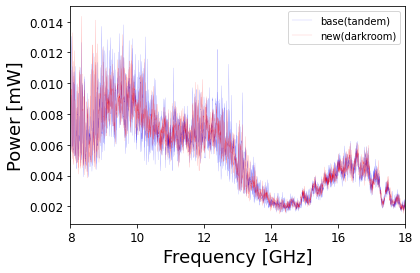

In [12]:
plt.plot(freq_base, power_base, label=f'base(tandem)', color='blue', marker='', markersize=0.5, linestyle='-', linewidth=0.1)
plt.plot(freq_new, power_new, label=f'new(darkroom)', color='red', marker='', markersize=0.5, linestyle='-', linewidth=0.1)

plt.xlabel('Frequency [GHz]',fontsize=18) #x軸の名前
plt.ylabel('Power [mW]',fontsize=18) #y軸の名前
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.xlim(8,9) #x軸範囲指定
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.ylim(0,0.02) #y軸範囲指定
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.savefig(f'{outdir}/power_mW.png')
plt.show()

# 8-9GHz

In [37]:
filename_base8 = '220302_004_300K_8_9GHz_without_allECO.csv'
filename_base8_withECO = '220302_004_300K_8_9GHz.csv'
#filename_new = '220304_003_300K_8_9GHz.csv'

freq_min = 8 # [GHz]
freq_max = 9 # [GHz]

freq_base8, power_base8 = read_csv(f'{datadir}/{filename_base8}')
freq_base8_withECO, power_base8_withECO = read_csv(f'{datadir}/{filename_base8_withECO}')
#freq_new8, power_new8 = read_csv(f'{datadir}/{filename_new}')

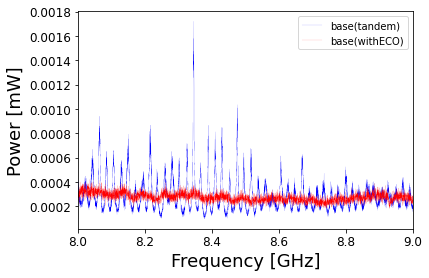

In [38]:
plt.plot(freq_base8, power_base8, label=f'base(tandem)', color='blue', marker='', markersize=0.5, linestyle='-', linewidth=0.1)
plt.plot(freq_base8_withECO, power_base8_withECO, label=f'base(withECO)', color='red', marker='', markersize=0.5, linestyle='-', linewidth=0.1)
#plt.plot(freq_new8, power_new8, label=f'new(darkroom)', color='black', marker='', markersize=0.5, linestyle='-', linewidth=0.1)

plt.xlabel('Frequency [GHz]',fontsize=18) #x軸の名前
plt.ylabel('Power [mW]',fontsize=18) #y軸の名前
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.xlim(8,9) #x軸範囲指定
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.ylim(0,0.02) #y軸範囲指定
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.savefig(f'{outdir}/power_mW.png')
plt.show()

# 9-10GHz

In [19]:
filename_base9 = '220302_004_300K_9_10GHz_without_allECO.csv'
filename_base9_withECO = '220302_004_300K_9_10GHz.csv'
#filename_new = '220304_003_300K_9_10GHz.csv'

freq_min = 9 # [GHz]
freq_max = 10 # [GHz]

freq_base9, power_base9 = read_csv(f'{datadir}/{filename_base9}')
freq_base9_withECO, power_base9_withECO = read_csv(f'{datadir}/{filename_base9_withECO}')
#freq_new9, power_new9 = read_csv(f'{datadir}/{filename_new}')

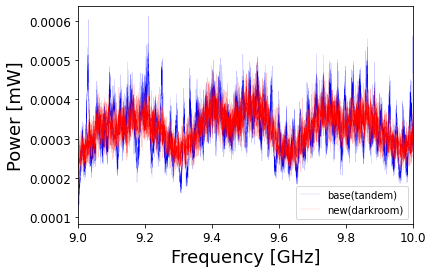

In [20]:
plt.plot(freq_base9, power_base9, label=f'base(tandem)', color='blue', marker='', markersize=0.5, linestyle='-', linewidth=0.1)
plt.plot(freq_base9_withECO, power_base9_withECO, label=f'base(withECO)', color='red', marker='', markersize=0.5, linestyle='-', linewidth=0.1)
#plt.plot(freq_new9, power_new9, label=f'new(darkroom)', color='black', marker='', markersize=0.5, linestyle='-', linewidth=0.1)

plt.xlabel('Frequency [GHz]',fontsize=18) #x軸の名前
plt.ylabel('Power [mW]',fontsize=18) #y軸の名前
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.xlim(9,10) #x軸範囲指定
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.ylim(0,0.02) #y軸範囲指定
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.savefig(f'{outdir}/power_mW.png')
plt.show()

# 10-11GHz

In [27]:
filename_base10 = '220302_004_300K_10_11GHz_without_allECO.csv'
filename_base10_withECO = '220302_004_300K_10_11GHz.csv'
#filename_new = '220304_003_300K_9_10GHz.csv'

freq_min = 10 # [GHz]
freq_max = 11 # [GHz]

freq_base10, power_base10 = read_csv(f'{datadir}/{filename_base10}')
freq_base10_withECO, power_base10_withECO = read_csv(f'{datadir}/{filename_base10_withECO}')
#freq_new10, power_new10 = read_csv(f'{datadir}/{filename_new}')

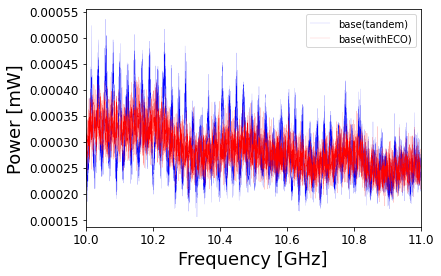

In [28]:
plt.plot(freq_base10, power_base10, label=f'base(tandem)', color='blue', marker='', markersize=0.5, linestyle='-', linewidth=0.1)
plt.plot(freq_base10_withECO, power_base10_withECO, label=f'base(withECO)', color='red', marker='', markersize=0.5, linestyle='-', linewidth=0.1)
#plt.plot(freq_new10, power_new10, label=f'new(darkroom)', color='black', marker='', markersize=0.5, linestyle='-', linewidth=0.1)

plt.xlabel('Frequency [GHz]',fontsize=18) #x軸の名前
plt.ylabel('Power [mW]',fontsize=18) #y軸の名前
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.xlim(10,11) #x軸範囲指定
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.ylim(0,0.02) #y軸範囲指定
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.savefig(f'{outdir}/power_mW.png')
plt.show()

# 11-12GHz

In [29]:
filename_base11 = '220302_004_300K_11_12GHz_without_allECO.csv'
filename_base11_withECO = '220302_004_300K_11_12GHz.csv'
#filename_new = '220302_002_300K_without_upperECO.csv'

freq_min = 11 # [GHz]
freq_max = 12 # [GHz]

freq_base11, power_base11 = read_csv(f'{datadir}/{filename_base11}')
freq_base11_withECO, power_base11_withECO = read_csv(f'{datadir}/{filename_base11_withECO}')
#freq_new11, power_new11 = read_csv(f'{datadir}/{filename_new}')

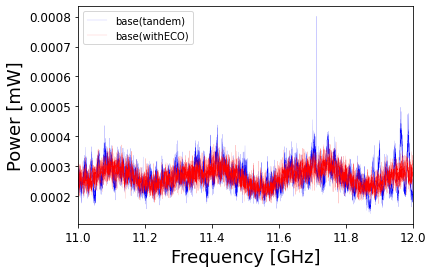

In [30]:
plt.plot(freq_base11, power_base11, label=f'base(tandem)', color='blue', marker='', markersize=0.5, linestyle='-', linewidth=0.1)
plt.plot(freq_base11_withECO, power_base11_withECO, label=f'base(withECO)', color='red', marker='', markersize=0.5, linestyle='-', linewidth=0.1)
#plt.plot(freq_new11, power_new11, label=f'new(darkroom)', color='black', marker='', markersize=0.5, linestyle='-', linewidth=0.1)

plt.xlabel('Frequency [GHz]',fontsize=18) #x軸の名前
plt.ylabel('Power [mW]',fontsize=18) #y軸の名前
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.xlim(11,12) #x軸範囲指定
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.ylim(0,0.02) #y軸範囲指定
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.savefig(f'{outdir}/power_mW.png')
plt.show()

# 11-11.1GHz

In [32]:
filename_base110_withECO = '220302_004_300K_11_11.1GHz.csv'
#filename_new = '220302_002_300K_without_upperECO.csv'

freq_min = 11.0 # [GHz]
freq_max = 11.1 # [GHz]

freq_base110_withECO, power_base110_withECO = read_csv(f'{datadir}/{filename_base110_withECO}')
#freq_new110, power_new110 = read_csv(f'{datadir}/{filename_new}')

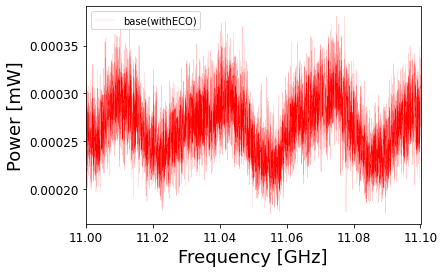

In [36]:
plt.plot(freq_base110_withECO, power_base11_withECO, label=f'base(withECO)', color='red', marker='', markersize=0.5, linestyle='-', linewidth=0.1)

plt.xlabel('Frequency [GHz]',fontsize=18) #x軸の名前
plt.ylabel('Power [mW]',fontsize=18) #y軸の名前
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.xlim(11,11.1) #x軸範囲指定
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.ylim(0,0.02) #y軸範囲指定
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.savefig(f'{outdir}/power_mW.png')
plt.show()